In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import os
import cv2
from matplotlib import pyplot as plt

In [19]:
Datadirectory="Training/"

In [20]:
Classes = ["0","1","2","3","4","5","6"]

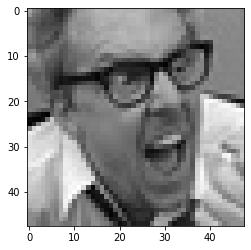

In [21]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
        

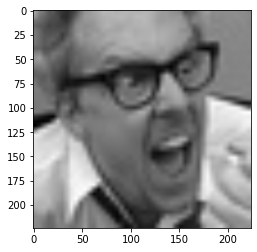

In [22]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
new_array.shape

(224, 224, 3)

In [27]:
training_Datas = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        print(path)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array, (img_size,img_size))
                training_Datas.append([new_array,class_num])
            except Exception as e:
                pass
create_training_Data()

Training/0
Training/1
Training/2
Training/3
Training/4
Training/5
Training/6


In [29]:
print(len(training_Datas))

3457


In [30]:
import numpy as np
x = []
y = []

for features,label in training_Datas:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size,img_size, 3)

In [31]:
x.shape

(3457, 224, 224, 3)

In [32]:
x = []
y = []

for features,label in training_Datas:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size,img_size, 3)

In [33]:
x=x/255.0;

In [34]:
y[1000]

1

In [35]:
y[0]

0

In [36]:
type(y)

list

In [37]:
Y=np.array(y)

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
model =tf.keras.applications.MobileNetV2()

14540800/14536120 [==============================] - 54s 4us/step


In [40]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [41]:
base_input=model.layers[0].input

In [42]:
base_output=model.layers[-2].output

In [43]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [44]:
final_output = layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)

In [45]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [47]:
new_model=keras.Model(inputs = base_input,outputs = final_output)

In [48]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [49]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [51]:
Y[1000]

1

In [ ]:
new_model.fit(x,Y,epochs=25)

In [53]:
new_model.save('mod_my_model_94p69.h5')

In [5]:
new_model=tf.keras.models.load_model('mod_my_model_94p69.h5')

In [3]:
frame=cv2.imread("Testing/hboy.jpg")

In [4]:
frame.shape

(232, 300, 3)

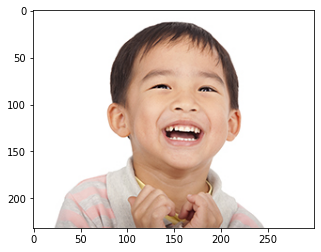

In [5]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [36]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [37]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [8]:
gray.shape

(232, 300)

In [9]:
frame.shape

(232, 300, 3)

In [10]:
faces=faceCascade.detectMultiScale(gray,1.1,4)

In [11]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray  = gray [y:y+h, x:x+w]
    roi_color = frame [y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detdected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey: ey+eh, ex:ex +ew]

In [12]:
len(faces)

1

In [13]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w, y+h),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey: ey+eh, ex:ex +ew]

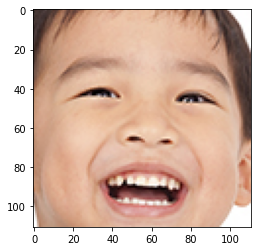

In [16]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [28]:
import numpy as np
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis =0)
final_image=final_image/255.0

In [30]:
new_model = tf.keras.models.load_model('mod_my_model_94p69.h5')
predictions=new_model.predict(final_image)

2022-04-24 05:00:29.850445: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-24 05:00:29.850625: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-24 05:00:31.090075: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


In [31]:
predictions[0]

array([1.4979330e-01, 6.9923002e-01, 5.2660272e-02, 1.8146126e-02,
       1.2005941e-02, 5.3555658e-04, 6.7628831e-02], dtype=float32)

In [32]:
np.argmax(predictions)

1